In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
DATA_PATH = "../../data/clean/sud3_no2.pkl"

In [3]:
df = pd.read_pickle(DATA_PATH)
df = df.reset_index()
df = df.dropna()
df.head(10)

,index,date,ref,NO2_61FD,NO2_61F0,NO2_61EF,rh,t_grad,pressure,temp,pluvio
0,0,2017-09-28 10:15:00,38.5,1.0,4.1,16.2,75.7,-2.3,1019.7,20.4,0.0
1,1,2017-09-28 10:30:00,32.3,0.7,9.1,0.0,74.8,-2.4,1019.7,20.6,0.0
2,2,2017-09-28 10:45:00,38.5,6.1,14.2,4.1,74.6,-2.2,1019.7,20.7,0.0
3,3,2017-09-28 11:00:00,29.7,0.0,2.0,1.4,73.2,-2.2,1019.6,21.2,0.0
4,4,2017-09-28 11:15:00,19.4,0.0,6.1,0.0,72.3,-2.6,1019.7,21.5,0.0
5,5,2017-09-28 11:30:00,10.8,0.0,0.0,0.0,71.3,-2.3,1019.7,21.9,0.0
6,6,2017-09-28 11:45:00,12.4,0.0,1.0,0.0,70.0,-2.6,1019.7,22.0,0.0
7,7,2017-09-28 12:00:00,12.3,0.0,0.0,0.0,69.5,-2.5,1019.7,22.1,0.0
8,8,2017-09-28 12:15:00,9.7,0.0,0.0,0.0,69.3,-2.8,1019.6,22.3,0.0
9,9,2017-09-28 12:30:00,13.8,0.0,0.0,0.0,67.9,-3.1,1019.6,23.1,0.0


# Premier modèle: Perceptron

Pour commencer, on crée un simple modèle de réseau de neurones à 1 couches dense et 1 couche de prédiction

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

def baseline_model(dense_size, input_dim, loss='mean_squared_error', optimizer='adam'):
    # 
    model = Sequential()
    model.add(Dense(dense_size, input_dim=input_dim, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss=loss, optimizer=optimizer)
    model.summary()
    return model

Using TensorFlow backend.


### Découpage en trois jeux de données pour la validation croisée

In [5]:
# On effectue une permutation ici afin d'obtenir la répartition la plus homogène possible par jeu de donnée
df = df.reindex(np.random.permutation(df.index)) 

def split_dataframe(dataframe, percent):
    """ Méthode permettant de séparer une dataframe en deux en fonction d'un pourcentage donné
    """
    nb_rows = int(np.floor(percent * len(dataframe)))
    return dataframe[:nb_rows], dataframe[nb_rows:]

def dataframe_to_xy(df):
    """ Retourne X et y en prenant une dataframe en argument
    """
    return (np.array(df[['NO2_61FD', 'NO2_61F0', 'NO2_61EF', 'temp', 'rh',\
                         't_grad', 'pressure', 'pluvio']]),\
            np.array(df['ref']))

df_train, df_test = split_dataframe(df, 0.5) 
df_valid, df_test = split_dataframe(df_test, 0.5)

X_train, y_train = dataframe_to_xy(df_train)
X_valid, y_valid = dataframe_to_xy(df_valid)
X_test, y_test = dataframe_to_xy(df_test)

### Distribution des données sur les 3 jeux de validation croisée

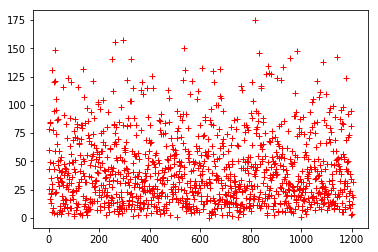

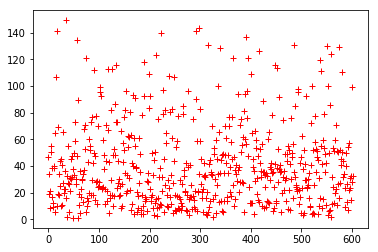

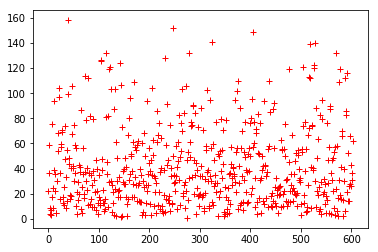

In [6]:
plt.plot(y_train, '+r')
plt.show()
plt.plot(y_valid, '+r')
plt.show()
plt.plot(y_test, '+r')
plt.show()

In [7]:
model = baseline_model(32, X_train.shape[1], 'mean_squared_error', 'adam')
early_stopping = EarlyStopping(monitor='val_loss', verbose=1, mode='auto', patience=10)
history = model.fit(X_train, y_train, batch_size=32, epochs=5000, validation_data=(X_valid, y_valid), callbacks=[early_stopping], verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
Train on 1206 samples, validate on 603 samples
Epoch 1/5000
1206/1206 [==============================] - 0s 98us/step - loss: 2361.3632 - val_loss: 835.8318
Epoch 2/5000
1206/1206 [==============================] - 0s 34us/step - loss: 813.3236 - val_loss: 735.8533
Epoch 3/5000
1206/1206 [==============================] - 0s 31us/step - loss: 719.2045 - val_loss: 647.6526
Epoch 4/5000
1206/1206 [==============================] - 0s 33us/step - loss: 622.7014 - val_loss: 549.5734
Epoch 5/5000
1206/1206 [==============================] 

1206/1206 [==============================] - 0s 31us/step - loss: 66.8050 - val_loss: 69.6172
Epoch 71/5000
1206/1206 [==============================] - 0s 32us/step - loss: 65.9364 - val_loss: 72.1950
Epoch 72/5000
1206/1206 [==============================] - 0s 31us/step - loss: 67.1467 - val_loss: 68.9790
Epoch 73/5000
1206/1206 [==============================] - 0s 31us/step - loss: 65.2567 - val_loss: 68.9418
Epoch 74/5000
1206/1206 [==============================] - 0s 32us/step - loss: 66.6684 - val_loss: 68.2919
Epoch 75/5000
1206/1206 [==============================] - 0s 32us/step - loss: 64.3532 - val_loss: 67.8070
Epoch 76/5000
1206/1206 [==============================] - 0s 32us/step - loss: 66.0253 - val_loss: 72.9926
Epoch 77/5000
1206/1206 [==============================] - 0s 32us/step - loss: 64.7825 - val_loss: 68.3562
Epoch 78/5000
1206/1206 [==============================] - 0s 32us/step - loss: 65.5102 - val_loss: 66.9180
Epoch 79/5000
1206/1206 [=================

1206/1206 [==============================] - 0s 34us/step - loss: 52.1634 - val_loss: 60.6514
Epoch 146/5000
1206/1206 [==============================] - 0s 35us/step - loss: 49.8324 - val_loss: 54.6150
Epoch 147/5000
1206/1206 [==============================] - 0s 32us/step - loss: 49.9314 - val_loss: 54.7274
Epoch 148/5000
1206/1206 [==============================] - 0s 32us/step - loss: 48.5048 - val_loss: 54.6933
Epoch 149/5000
1206/1206 [==============================] - 0s 32us/step - loss: 49.7093 - val_loss: 54.6352
Epoch 150/5000
1206/1206 [==============================] - 0s 31us/step - loss: 48.1773 - val_loss: 53.6159
Epoch 151/5000
1206/1206 [==============================] - 0s 31us/step - loss: 49.1823 - val_loss: 53.7516
Epoch 152/5000
1206/1206 [==============================] - 0s 32us/step - loss: 48.7976 - val_loss: 56.4757
Epoch 153/5000
1206/1206 [==============================] - 0s 32us/step - loss: 48.5680 - val_loss: 54.5940
Epoch 154/5000
1206/1206 [========

### Courbes de résultats pour modèle à une couche dense

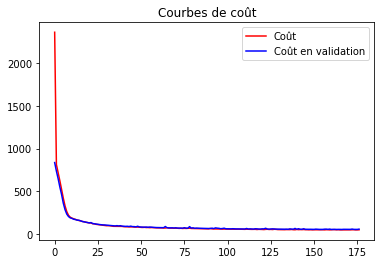

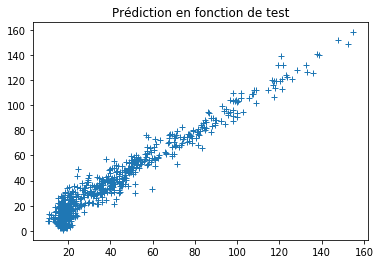

In [8]:
y_pred = model.predict(X_test)
plt.plot(history.history['loss'], 'r-', label="Coût")
plt.plot(history.history['val_loss'], 'b-', label="Coût en validation")
plt.title("Courbes de coût")
plt.legend()
plt.show()

plt.title('y_pred, y_test')

plt.plot(y_pred[:], y_test[:], '+')
plt.title("Prédiction en fonction de test")
plt.show()

## MLP 2 Couches

### Définition du modèle

In [9]:
def two_layers_mlp_model(nb_units, dense_size, loss='mean_squared_error', optimizer='adam'):
    model = Sequential()
    model.add(Dense(dense_size, input_dim=dense_size, kernel_initializer='normal', activation='relu'))
    model.add(Dense(dense_size//2, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss=loss, optimizer=optimizer)
    model.summary()
    return model

model = two_layers_mlp_model(32, X_train.shape[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


### Apprentissage

In [10]:
early_stopping = EarlyStopping(monitor='val_loss', verbose=1, mode='auto', patience=10)
history = model.fit(X_train, y_train, batch_size=32, epochs=5000, validation_data=(X_valid, y_valid), callbacks=[early_stopping], verbose=1)

Train on 1206 samples, validate on 603 samples
Epoch 1/5000
1206/1206 [==============================] - 0s 116us/step - loss: 2744.4987 - val_loss: 2467.7657
Epoch 2/5000
1206/1206 [==============================] - 0s 33us/step - loss: 2417.0958 - val_loss: 1837.3617
Epoch 3/5000
1206/1206 [==============================] - 0s 34us/step - loss: 1442.7082 - val_loss: 908.1539
Epoch 4/5000
1206/1206 [==============================] - 0s 33us/step - loss: 887.7221 - val_loss: 838.9124
Epoch 5/5000
1206/1206 [==============================] - 0s 34us/step - loss: 850.8948 - val_loss: 799.1961
Epoch 6/5000
1206/1206 [==============================] - 0s 35us/step - loss: 814.8313 - val_loss: 767.3619
Epoch 7/5000
1206/1206 [==============================] - 0s 36us/step - loss: 779.7934 - val_loss: 735.9032
Epoch 8/5000
1206/1206 [==============================] - 0s 36us/step - loss: 742.6188 - val_loss: 696.3867
Epoch 9/5000
1206/1206 [==============================] - 0s 35us/step - lo

1206/1206 [==============================] - 0s 35us/step - loss: 117.0845 - val_loss: 117.5017
Epoch 76/5000
1206/1206 [==============================] - 0s 34us/step - loss: 115.5821 - val_loss: 117.3166
Epoch 77/5000
1206/1206 [==============================] - 0s 34us/step - loss: 115.9379 - val_loss: 118.8367
Epoch 78/5000
1206/1206 [==============================] - 0s 34us/step - loss: 115.9959 - val_loss: 120.9091
Epoch 79/5000
1206/1206 [==============================] - 0s 35us/step - loss: 115.7216 - val_loss: 116.9027
Epoch 80/5000
1206/1206 [==============================] - 0s 34us/step - loss: 116.4255 - val_loss: 116.8886
Epoch 81/5000
1206/1206 [==============================] - 0s 34us/step - loss: 116.3133 - val_loss: 117.7055
Epoch 82/5000
1206/1206 [==============================] - 0s 34us/step - loss: 116.1768 - val_loss: 116.8051
Epoch 83/5000
1206/1206 [==============================] - 0s 35us/step - loss: 115.7935 - val_loss: 116.9374
Epoch 84/5000
1206/1206 

1206/1206 [==============================] - 0s 33us/step - loss: 115.1249 - val_loss: 115.4756
Epoch 150/5000
1206/1206 [==============================] - 0s 35us/step - loss: 114.7805 - val_loss: 115.1576
Epoch 151/5000
1206/1206 [==============================] - 0s 36us/step - loss: 114.6177 - val_loss: 116.0971
Epoch 152/5000
1206/1206 [==============================] - 0s 35us/step - loss: 114.5442 - val_loss: 116.2241
Epoch 153/5000
1206/1206 [==============================] - 0s 34us/step - loss: 113.9452 - val_loss: 115.0591
Epoch 154/5000
1206/1206 [==============================] - 0s 33us/step - loss: 114.7372 - val_loss: 115.3030
Epoch 155/5000
1206/1206 [==============================] - 0s 32us/step - loss: 114.1687 - val_loss: 115.0660
Epoch 156/5000
1206/1206 [==============================] - 0s 34us/step - loss: 114.2044 - val_loss: 115.0010
Epoch 157/5000
1206/1206 [==============================] - 0s 36us/step - loss: 114.2430 - val_loss: 115.1388
Epoch 158/5000
1

### Courbes de résultats pour modèle à deux couches denses

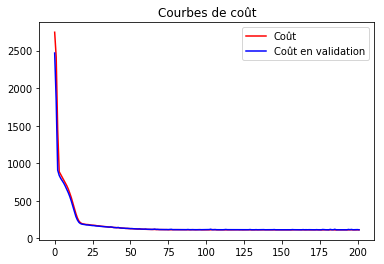

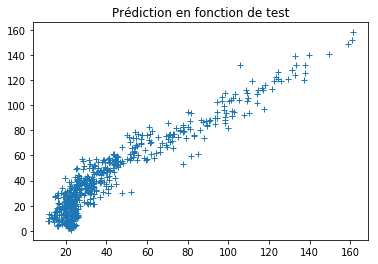

In [11]:
y_pred = model.predict(X_test)
plt.plot(history.history['loss'], 'r-', label="Coût")
plt.plot(history.history['val_loss'], 'b-', label="Coût en validation")
plt.title("Courbes de coût")
plt.legend()
plt.show()

plt.title('y_pred, y_test')

plt.plot(y_pred[:], y_test[:], '+')
plt.title("Prédiction en fonction de test")
plt.show()

# Conclusion

Sur ces premiers tests, le modèle a une couche a l'air un peu plus performant que le modèle a deux couches. En effet, le modèle prédictif est presque linéaire. Essayons maintenant d'implémenter un modèle récurrent